<a href="https://colab.research.google.com/github/ashishpandey45/100_Days_of_Code/blob/main/Apple_Stock_Forecasting_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-7-b082ee234920>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
<ipython-input-7-b082ee234920>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())
<ipython-input-7-b082ee234920>:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

246/246 ━━━━━━━━━━━━━━━━━━━━ 18s 61ms/step - loss: 2.4236e-04
246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


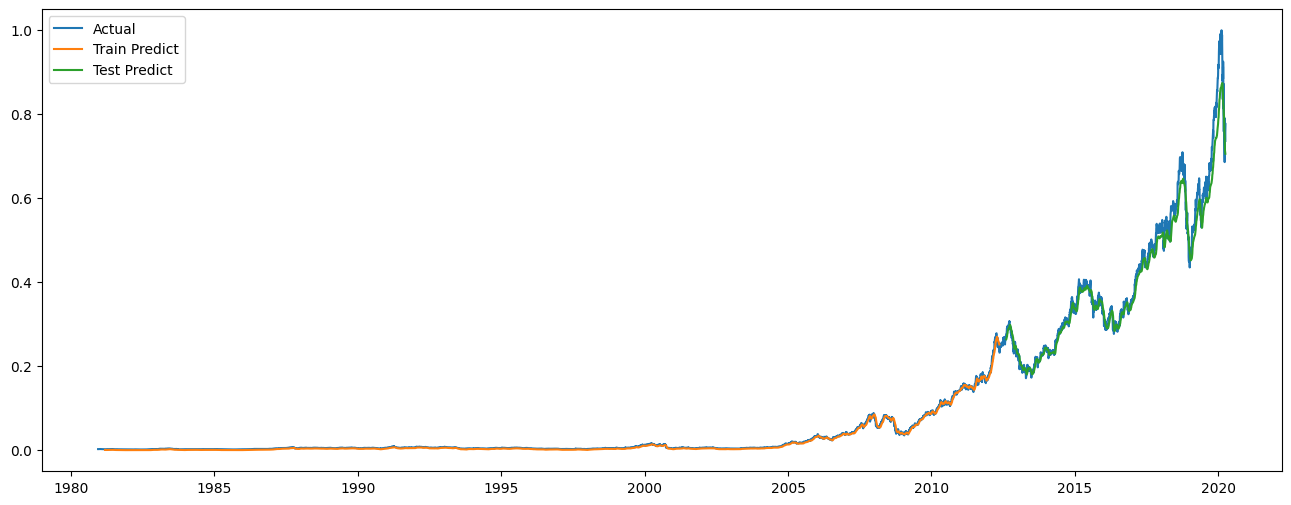

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Load the dataset
data = pd.read_csv("AAPL.csv")

# Extract the relevant columns (e.g., 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume')
df = data[['Date', 'Close']]

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Normalize the 'Close' column
df['Close'] = (df['Close'] - df['Close'].min()) / (df['Close'].max() - df['Close'].min())

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

# Create sequences for the LSTM model
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):  # Adjust the loop condition if needed
        X.append(data[i:(i+seq_length)].values)
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Create sequences
seq_length = 60
X_train, y_train = create_sequences(train_data['Close'], seq_length)
X_test, y_test = create_sequences(test_data['Close'], seq_length)

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse the normalization
train_predict = train_predict * (df['Close'].max() - df['Close'].min()) + df['Close'].min()
test_predict = test_predict * (df['Close'].max() - df['Close'].min()) + df['Close'].min()

# Evaluate the model
# ... (calculate metrics, visualize results)

# Plot the results
plt.figure(figsize=(16, 6))
plt.plot(df['Close'], label='Actual')
plt.plot(train_data.index[seq_length:], train_predict, label='Train Predict')
plt.plot(test_data.index[seq_length:], test_predict, label='Test Predict')
plt.legend()
plt.show()